#### Date and Time Data Types and Tools

In [1]:
from datetime import datetime

now = datetime.now()

In [2]:
now

datetime.datetime(2018, 12, 9, 17, 16, 24, 616684)

In [3]:
now.year, now.month, now.day

(2018, 12, 9)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

![datetime](./pics/datetime.png)

#### Converting Between String and Datetime

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

![datetime-format](./pics/datetime-format.png)

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [13]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [16]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2]

NaT

In [19]:
pd.isnull(idx)

array([False, False,  True])

> NaT (Not a Time) is pandas’s null value for timestamp data.

#### Time Series Basics

In [20]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [21]:
import numpy as np

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.426478
2011-01-05    0.718875
2011-01-07    0.266654
2011-01-08   -1.545796
2011-01-10   -0.039350
2011-01-12    0.219609
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts + ts[::2]

2011-01-02   -0.852957
2011-01-05         NaN
2011-01-07    0.533309
2011-01-08         NaN
2011-01-10   -0.078699
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

#### Indexing, Selection, Subsetting

In [26]:
stamp = ts.index[2]
ts[stamp]

0.2666542526771349

In [27]:
ts['1/10/2011']

-0.0393495656353566

In [28]:
ts['20110110']

-0.0393495656353566

In [29]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [30]:
longer_ts.tail()

2002-09-22   -1.335262
2002-09-23   -2.153054
2002-09-24   -0.539872
2002-09-25   -1.237235
2002-09-26   -0.377409
Freq: D, dtype: float64

In [31]:
longer_ts['2001']

2001-01-01   -0.059042
2001-01-02    0.020733
2001-01-03    1.049999
2001-01-04   -2.401283
2001-01-05   -0.033086
2001-01-06    0.791833
2001-01-07   -1.987137
2001-01-08   -0.320783
2001-01-09   -2.027483
2001-01-10   -0.456823
2001-01-11   -0.679629
2001-01-12   -0.997684
2001-01-13    0.956845
2001-01-14    1.030056
2001-01-15   -0.095456
2001-01-16    0.298784
2001-01-17    1.296040
2001-01-18   -1.951159
2001-01-19    0.340624
2001-01-20    0.137008
2001-01-21   -1.201515
2001-01-22    0.738183
2001-01-23   -0.549688
2001-01-24    0.311062
2001-01-25   -0.889589
2001-01-26   -0.985076
2001-01-27    0.009026
2001-01-28   -0.711824
2001-01-29   -2.988160
2001-01-30   -0.464466
                ...   
2001-12-02   -0.799861
2001-12-03   -0.559615
2001-12-04   -0.696222
2001-12-05    0.568191
2001-12-06    0.258919
2001-12-07   -0.924108
2001-12-08   -0.765289
2001-12-09   -0.240562
2001-12-10    0.953267
2001-12-11   -0.152307
2001-12-12   -0.775712
2001-12-13   -0.342696
2001-12-14 

In [32]:
longer_ts['2001-05']

2001-05-01   -2.048851
2001-05-02   -0.976645
2001-05-03    0.870820
2001-05-04   -0.544974
2001-05-05    0.126800
2001-05-06    2.504233
2001-05-07    1.365670
2001-05-08   -1.613072
2001-05-09   -0.325874
2001-05-10    1.155872
2001-05-11    1.254868
2001-05-12    1.213263
2001-05-13    1.142714
2001-05-14    0.193895
2001-05-15   -0.391037
2001-05-16   -0.200749
2001-05-17   -0.108609
2001-05-18    0.031075
2001-05-19    1.275564
2001-05-20    0.363835
2001-05-21    0.342039
2001-05-22   -1.341145
2001-05-23    0.289197
2001-05-24    0.051071
2001-05-25    2.108431
2001-05-26   -0.676531
2001-05-27    0.297806
2001-05-28    0.736149
2001-05-29    1.064825
2001-05-30   -0.116626
2001-05-31   -0.415354
Freq: D, dtype: float64

In [33]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.266654
2011-01-08   -1.545796
2011-01-10   -0.039350
2011-01-12    0.219609
dtype: float64

In [34]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.266654
2011-01-08   -1.545796
2011-01-10   -0.039350
dtype: float64

In [35]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.426478
2011-01-05    0.718875
2011-01-07    0.266654
2011-01-08   -1.545796
dtype: float64

In [36]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.609876,1.017017,1.630762,1.429902
2001-05-09,0.782614,-0.131171,-0.285149,-0.432999
2001-05-16,0.833504,0.090343,-0.915609,0.537864
2001-05-23,1.915869,0.503378,-0.471856,-0.123110
2001-05-30,-0.571977,-1.348895,0.308473,2.216200


#### Time Series with Duplicate Indices

In [37]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [38]:
dup_ts.index.is_unique

False

In [39]:
dup_ts['1/3/2000']

4

In [40]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [41]:
grouped = dup_ts.groupby(level=0)
grouped

In [42]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [43]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

#### Date Ranges, Frequencies, and Shifting

In [44]:
ts

2011-01-02   -0.426478
2011-01-05    0.718875
2011-01-07    0.266654
2011-01-08   -1.545796
2011-01-10   -0.039350
2011-01-12    0.219609
dtype: float64

In [45]:
resampler = ts.resample('D')

In [46]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

#### Generating Date Ranges

In [47]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [48]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range('2000-01-01', '2001-01-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29'],
              dtype='datetime64[ns]', freq='BM')

![frequencies](./pics/frequencies.png)

In [51]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

#### Frequencies and Date Offsets

In [53]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [54]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [55]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [56]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

#### Shifting (Leading and Lagging) Data

In [57]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.193398
2000-02-29    0.839672
2000-03-31    0.731918
2000-04-30    0.525612
Freq: M, dtype: float64

In [58]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.193398
2000-04-30    0.839672
Freq: M, dtype: float64

In [59]:
ts.shift(-2)

2000-01-31    0.731918
2000-02-29    0.525612
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [60]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.296403
2000-03-31   -0.128329
2000-04-30   -0.281870
Freq: M, dtype: float64

In [61]:
ts.shift(2, freq='M')

2000-03-31    1.193398
2000-04-30    0.839672
2000-05-31    0.731918
2000-06-30    0.525612
Freq: M, dtype: float64

In [62]:
ts.shift(3, freq='D')

2000-02-03    1.193398
2000-03-03    0.839672
2000-04-03    0.731918
2000-05-03    0.525612
dtype: float64

In [63]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.193398
2000-02-29 01:30:00    0.839672
2000-03-31 01:30:00    0.731918
2000-04-30 01:30:00    0.525612
Freq: M, dtype: float64

In [64]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [65]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [66]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [67]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [68]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [69]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.029393
2000-01-19   -0.827037
2000-01-23    1.635604
2000-01-27    1.089042
2000-01-31   -0.943477
2000-02-04   -0.841577
2000-02-08    1.399728
2000-02-12    0.199975
2000-02-16    0.182154
2000-02-20    0.601229
2000-02-24   -0.171370
2000-02-28   -2.116720
2000-03-03    0.440077
2000-03-07   -0.151158
2000-03-11    0.306787
2000-03-15   -1.271158
2000-03-19   -1.272690
2000-03-23    0.269597
2000-03-27   -1.610781
2000-03-31   -0.440185
Freq: 4D, dtype: float64

In [70]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.196705
2000-02-29   -0.106654
2000-03-31   -0.466189
dtype: float64

In [71]:
ts.resample('M').mean()

2000-01-31    0.196705
2000-02-29   -0.106654
2000-03-31   -0.466189
Freq: M, dtype: float64

#### Time Zone Handling

In [72]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [73]:
tz = pytz.timezone('America/New_York')

In [74]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [75]:
tz = pytz.timezone('Asia/Shanghai')

In [76]:
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

#### Time Zone Localization and Conversion

In [77]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.972422
2012-03-10 09:30:00   -0.013699
2012-03-11 09:30:00    0.146168
2012-03-12 09:30:00   -1.126622
2012-03-13 09:30:00   -1.392791
2012-03-14 09:30:00   -1.644580
Freq: D, dtype: float64

In [78]:
print(ts.index.tz)

None


In [79]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [80]:
ts

2012-03-09 09:30:00   -0.972422
2012-03-10 09:30:00   -0.013699
2012-03-11 09:30:00    0.146168
2012-03-12 09:30:00   -1.126622
2012-03-13 09:30:00   -1.392791
2012-03-14 09:30:00   -1.644580
Freq: D, dtype: float64

In [81]:
ts_utc = ts.tz_localize('UTC')

In [82]:
ts_utc

2012-03-09 09:30:00+00:00   -0.972422
2012-03-10 09:30:00+00:00   -0.013699
2012-03-11 09:30:00+00:00    0.146168
2012-03-12 09:30:00+00:00   -1.126622
2012-03-13 09:30:00+00:00   -1.392791
2012-03-14 09:30:00+00:00   -1.644580
Freq: D, dtype: float64

In [83]:
ts.tz_localize('Asia/Shanghai')

2012-03-09 09:30:00+08:00   -0.972422
2012-03-10 09:30:00+08:00   -0.013699
2012-03-11 09:30:00+08:00    0.146168
2012-03-12 09:30:00+08:00   -1.126622
2012-03-13 09:30:00+08:00   -1.392791
2012-03-14 09:30:00+08:00   -1.644580
Freq: D, dtype: float64

In [84]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [85]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [86]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.972422
2012-03-10 04:30:00-05:00   -0.013699
2012-03-11 05:30:00-04:00    0.146168
2012-03-12 05:30:00-04:00   -1.126622
2012-03-13 05:30:00-04:00   -1.392791
2012-03-14 05:30:00-04:00   -1.644580
Freq: D, dtype: float64

In [87]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.972422
2012-03-10 14:30:00+00:00   -0.013699
2012-03-11 13:30:00+00:00    0.146168
2012-03-12 13:30:00+00:00   -1.126622
2012-03-13 13:30:00+00:00   -1.392791
2012-03-14 13:30:00+00:00   -1.644580
Freq: D, dtype: float64

In [88]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.972422
2012-03-10 15:30:00+01:00   -0.013699
2012-03-11 14:30:00+01:00    0.146168
2012-03-12 14:30:00+01:00   -1.126622
2012-03-13 14:30:00+01:00   -1.392791
2012-03-14 14:30:00+01:00   -1.644580
Freq: D, dtype: float64

In [89]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

#### Operations with Time Zone−Aware Timestamp Objects 

In [90]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

In [91]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [92]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [93]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [94]:
stamp_utc.value

1299902400000000000

In [95]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [96]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [97]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [98]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [99]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [100]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.789753
2012-03-08 09:30:00    1.719712
2012-03-09 09:30:00   -0.655273
2012-03-12 09:30:00   -0.437331
2012-03-13 09:30:00   -1.461016
2012-03-14 09:30:00   -1.139615
2012-03-15 09:30:00    1.078052
2012-03-16 09:30:00    2.394412
2012-03-19 09:30:00   -1.981710
2012-03-20 09:30:00    1.674327
Freq: B, dtype: float64

In [101]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.789753
2012-03-08 09:30:00+00:00    1.719712
2012-03-09 09:30:00+00:00   -0.655273
2012-03-12 09:30:00+00:00   -0.437331
2012-03-13 09:30:00+00:00   -1.461016
2012-03-14 09:30:00+00:00   -1.139615
2012-03-15 09:30:00+00:00    1.078052
Freq: B, dtype: float64

In [102]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.655273
2012-03-12 13:30:00+04:00   -0.437331
2012-03-13 13:30:00+04:00   -1.461016
2012-03-14 13:30:00+04:00   -1.139615
2012-03-15 13:30:00+04:00    1.078052
Freq: B, dtype: float64

In [103]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.310546
2012-03-12 09:30:00+00:00   -0.874661
2012-03-13 09:30:00+00:00   -2.922032
2012-03-14 09:30:00+00:00   -2.279229
2012-03-15 09:30:00+00:00    2.156103
Freq: B, dtype: float64

In [104]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

####  Periods and Period Arithmetic

In [105]:
p = pd.Period(2007, freq='A-DEC')
p + 5

Period('2012', 'A-DEC')

In [106]:
p - 2

Period('2005', 'A-DEC')

In [107]:
pd.Period('2014', freq='A-DEC') - p

7

In [108]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [109]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.204743
2000-02   -1.455926
2000-03   -0.962945
2000-04   -1.163545
2000-05   -1.069309
2000-06    0.739896
Freq: M, dtype: float64

In [110]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### Period Frequency Conversion

In [111]:
p = pd.Period('2007', freq='A-FEB')

In [112]:
p

Period('2007', 'A-FEB')

In [113]:
p.asfreq('M', how='start')

Period('2006-03', 'M')

In [114]:
p.asfreq('M', how='end')

Period('2007-02', 'M')

![freqconversion](./pics/freqconversion.png)

In [115]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [116]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [117]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [118]:
ts

2006   -1.022959
2007   -0.066034
2008    0.327707
2009   -1.893278
Freq: A-DEC, dtype: float64

In [119]:
ts.asfreq('M', how='start')

2006-01   -1.022959
2007-01   -0.066034
2008-01    0.327707
2009-01   -1.893278
Freq: M, dtype: float64

In [120]:
ts.asfreq('B',how='end')

2006-12-29   -1.022959
2007-12-31   -0.066034
2008-12-31    0.327707
2009-12-31   -1.893278
Freq: B, dtype: float64

#### Quarterly Period Frequencies

In [121]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [122]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

![quarterlyFrequencyConventions](./pics/quarterlyFrequencyConventions.png)

In [123]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [124]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [125]:
p4pm

Period('2012-01-30 16:00', 'T')

In [126]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [127]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

In [128]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [129]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [130]:
ts.index = new_rng.to_timestamp(how='end')

In [131]:
ts

2010-10-28 16:00:59    0
2011-01-28 16:00:59    1
2011-04-28 16:00:59    2
2011-07-28 16:00:59    3
2011-10-28 16:00:59    4
2012-01-30 16:00:59    5
dtype: int64

#### Converting Timestamps to Periods (and Back)

In [132]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.486186
2000-02-29    1.054984
2000-03-31   -0.118791
Freq: M, dtype: float64

In [133]:
pts = ts.to_period()

In [134]:
pts

2000-01   -0.486186
2000-02    1.054984
2000-03   -0.118791
Freq: M, dtype: float64

In [135]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.328801
2000-01-30    0.629938
2000-01-31    0.209927
2000-02-01   -0.871658
2000-02-02   -0.150350
2000-02-03    0.607171
Freq: D, dtype: float64

In [136]:
ts2.to_period('M')

2000-01    1.328801
2000-01    0.629938
2000-01    0.209927
2000-02   -0.871658
2000-02   -0.150350
2000-02    0.607171
Freq: M, dtype: float64

In [137]:
pts = ts2.to_period()
pts

2000-01-29    1.328801
2000-01-30    0.629938
2000-01-31    0.209927
2000-02-01   -0.871658
2000-02-02   -0.150350
2000-02-03    0.607171
Freq: D, dtype: float64

In [138]:
pts.index.to_timestamp(how='start')[0]

Timestamp('2000-01-29 00:00:00', freq='D')

In [139]:
pts.to_timestamp(how='end')

2000-01-29    1.328801
2000-01-30    0.629938
2000-01-31    0.209927
2000-02-01   -0.871658
2000-02-02   -0.150350
2000-02-03    0.607171
Freq: D, dtype: float64

#### Creating a PeriodIndex from Arrays

In [140]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [141]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [142]:
data.index = index

In [143]:
data.head(4)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06


In [144]:
data.infl.head(4)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
Freq: Q-DEC, Name: infl, dtype: float64

#### Resampling and Frequency Conversion

*Resampling* refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*.

In [145]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head(10)

2000-01-01   -0.031923
2000-01-02   -0.235866
2000-01-03   -0.630390
2000-01-04   -0.638270
2000-01-05   -0.263527
2000-01-06    1.163051
2000-01-07    1.334887
2000-01-08   -0.570040
2000-01-09   -0.404450
2000-01-10    0.630358
Freq: D, dtype: float64

In [146]:
ts.resample('M').mean()

2000-01-31    0.192474
2000-02-29   -0.055222
2000-03-31   -0.191165
2000-04-30   -0.151156
Freq: M, dtype: float64

In [147]:
ts.resample('M', kind='period').mean()

2000-01    0.192474
2000-02   -0.055222
2000-03   -0.191165
2000-04   -0.151156
Freq: M, dtype: float64

![ResampleMethod](./pics/ResampleMethod.png)

#### Downsampling

In [148]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [149]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [150]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

![Five-minuteResampling](./pics/Five-minuteResampling.png)

In [151]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [152]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [153]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Upsampling and Interpolation

In [154]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.427925,1.717799,0.539226,0.603123
2000-01-12,1.107426,-0.203770,-0.871735,-0.008248


In [155]:
df_daily = frame.resample('D').asfreq()

In [156]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.427925,1.717799,0.539226,0.603123
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.107426,-0.203770,-0.871735,-0.008248


In [157]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.427925,1.717799,0.539226,0.603123
2000-01-06,1.427925,1.717799,0.539226,0.603123
2000-01-07,1.427925,1.717799,0.539226,0.603123
2000-01-08,1.427925,1.717799,0.539226,0.603123
2000-01-09,1.427925,1.717799,0.539226,0.603123
2000-01-10,1.427925,1.717799,0.539226,0.603123
2000-01-11,1.427925,1.717799,0.539226,0.603123
2000-01-12,1.107426,-0.203770,-0.871735,-0.008248


In [158]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.427925,1.717799,0.539226,0.603123
2000-01-06,1.427925,1.717799,0.539226,0.603123
2000-01-07,1.427925,1.717799,0.539226,0.603123
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.107426,-0.203770,-0.871735,-0.008248


In [159]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.427925,1.717799,0.539226,0.603123
2000-01-13,1.107426,-0.203770,-0.871735,-0.008248


#### Resampling with Periods

In [160]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [161]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.313696,-1.734661,-0.429318,-1.092666
2000-02,-0.578405,-0.066040,0.578507,0.516215
2000-03,1.065056,-0.768239,1.258386,-0.662462
2000-04,-0.010897,-0.185390,0.364440,-0.985632
2000-05,-0.005831,1.784572,-0.524190,-0.813208


In [162]:
aunnal_frame = frame.resample('A-DEC').mean()
aunnal_frame

,Colorado,Texas,New York,Ohio
2000,-0.072016,-0.048730,-0.004408,-0.253471
2001,0.063646,0.204672,0.047350,0.286352


In [163]:
aunnal_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.072016,-0.048730,-0.004408,-0.253471
2000Q2,-0.072016,-0.048730,-0.004408,-0.253471
2000Q3,-0.072016,-0.048730,-0.004408,-0.253471
2000Q4,-0.072016,-0.048730,-0.004408,-0.253471
2001Q1,0.063646,0.204672,0.047350,0.286352
2001Q2,0.063646,0.204672,0.047350,0.286352
2001Q3,0.063646,0.204672,0.047350,0.286352
2001Q4,0.063646,0.204672,0.047350,0.286352


In [164]:
aunnal_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.072016,-0.048730,-0.004408,-0.253471
2001Q1,-0.072016,-0.048730,-0.004408,-0.253471
2001Q2,-0.072016,-0.048730,-0.004408,-0.253471
2001Q3,-0.072016,-0.048730,-0.004408,-0.253471
2001Q4,0.063646,0.204672,0.047350,0.286352


#### Moving Window Functions

In [165]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [166]:
close_px_all.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

In [167]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [168]:
close_px = close_px.resample('B').ffill()

In [169]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


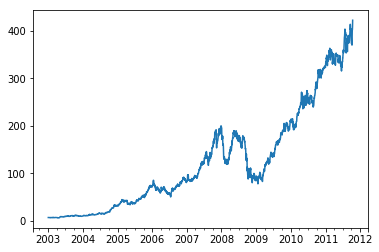

In [170]:
%matplotlib inline

close_px.AAPL.plot()

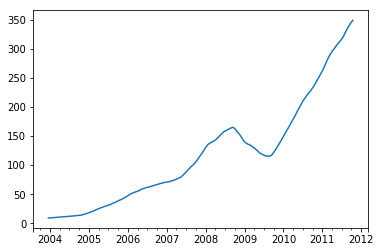

In [171]:
close_px.AAPL.rolling(250).mean().plot()

In [172]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [173]:
appl_std250[0:15]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
Freq: B, Name: AAPL, dtype: float64

In [174]:
close_px.AAPL[1] = 7.5

In [175]:
close_px.AAPL.head()

2003-01-02    7.40
2003-01-03    7.50
2003-01-06    7.45
2003-01-07    7.43
2003-01-08    7.28
Freq: B, Name: AAPL, dtype: float64

In [176]:
close_px.AAPL.rolling(250, min_periods=10).sum()[0:15]

2003-01-02       NaN
2003-01-03       NaN
2003-01-06       NaN
2003-01-07       NaN
2003-01-08       NaN
2003-01-09       NaN
2003-01-10       NaN
2003-01-13       NaN
2003-01-14       NaN
2003-01-15     73.60
2003-01-16     80.91
2003-01-17     87.96
2003-01-20     95.01
2003-01-21    102.02
2003-01-22    108.96
Freq: B, Name: AAPL, dtype: float64

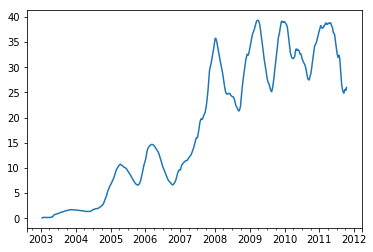

In [177]:
appl_std250.plot()

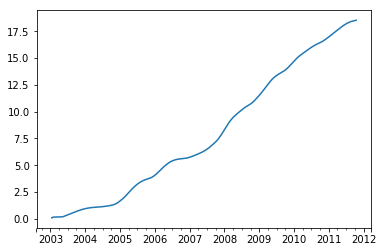

In [178]:
appl_std250.expanding().mean().plot()

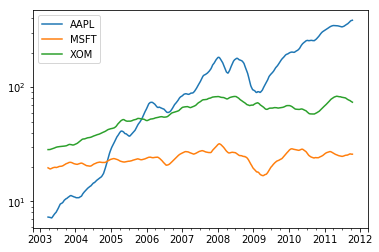

In [179]:
close_px.rolling(60).mean().plot(logy=True)

In [180]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400,21.110000,29.220000
2003-01-03,7.450,21.125000,29.230000
2003-01-06,7.450,21.256667,29.473333
2003-01-07,7.445,21.425000,29.342500
2003-01-08,7.412,21.402000,29.240000


In [181]:
aapl_px = close_px.AAPL['2006':'2007']

In [182]:
aapl_px.head()

2006-01-02    71.89
2006-01-03    74.75
2006-01-04    74.97
2006-01-05    74.38
2006-01-06    76.30
Freq: B, Name: AAPL, dtype: float64

In [183]:
aapl_px.tail()

2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, dtype: float64

In [184]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [185]:
ma60.head(25)

2006-01-02          NaN
2006-01-03          NaN
2006-01-04          NaN
2006-01-05          NaN
2006-01-06          NaN
2006-01-09          NaN
2006-01-10          NaN
2006-01-11          NaN
2006-01-12          NaN
2006-01-13          NaN
2006-01-16          NaN
2006-01-17          NaN
2006-01-18          NaN
2006-01-19          NaN
2006-01-20          NaN
2006-01-23          NaN
2006-01-24          NaN
2006-01-25          NaN
2006-01-26          NaN
2006-01-27    78.158500
2006-01-30    78.008095
2006-01-31    77.894545
2006-02-01    77.786957
2006-02-02    77.550000
2006-02-03    77.322000
Freq: B, Name: AAPL, dtype: float64

In [186]:
ewma60 = aapl_px.ewm(span=30).mean()

In [187]:
ewma60.head(25)

2006-01-02    71.890000
2006-01-03    73.367667
2006-01-04    73.937767
2006-01-05    74.059619
2006-01-06    74.569360
2006-01-09    74.859024
2006-01-10    75.896932
2006-01-11    77.145698
2006-01-12    78.166996
2006-01-13    79.150958
2006-01-16    79.950115
2006-01-17    80.507644
2006-01-18    80.728233
2006-01-19    80.548765
2006-01-20    80.093788
2006-01-23    79.855407
2006-01-24    79.492441
2006-01-25    79.003919
2006-01-26    78.404534
2006-01-27    77.846161
2006-01-30    77.602477
2006-01-31    77.427025
2006-02-01    77.261930
2006-02-02    76.844719
2006-02-03    76.447500
Freq: B, Name: AAPL, dtype: float64

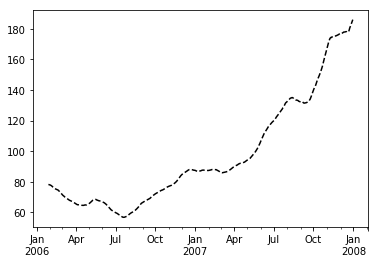

In [188]:
ma60.plot(style='k--', label='Simple MA')

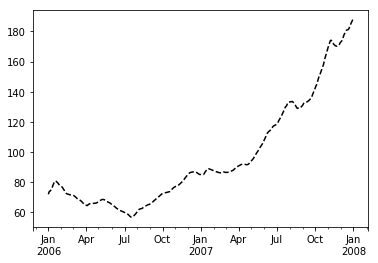

In [189]:
ewma60.plot(style='k--', label='EW MA')

In [190]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()

In [191]:
returns = close_px.pct_change()

In [192]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

In [193]:
corr.head(110)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16         NaN
2003-01-17         NaN
2003-01-20         NaN
2003-01-21         NaN
2003-01-22         NaN
2003-01-23         NaN
2003-01-24         NaN
2003-01-27         NaN
2003-01-28         NaN
2003-01-29         NaN
2003-01-30         NaN
2003-01-31         NaN
2003-02-03         NaN
2003-02-04         NaN
2003-02-05         NaN
2003-02-06         NaN
2003-02-07         NaN
2003-02-10         NaN
2003-02-11         NaN
2003-02-12         NaN
                ...   
2003-04-24         NaN
2003-04-25         NaN
2003-04-28         NaN
2003-04-29         NaN
2003-04-30         NaN
2003-05-01         NaN
2003-05-02         NaN
2003-05-05         NaN
2003-05-06         NaN
2003-05-07         NaN
2003-05-08         NaN
2003-05-09         NaN
2003-05-12 

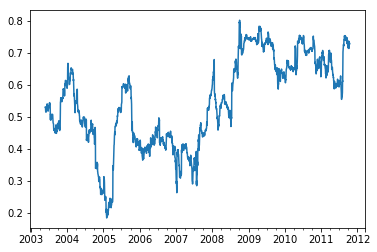

In [194]:
corr.plot()

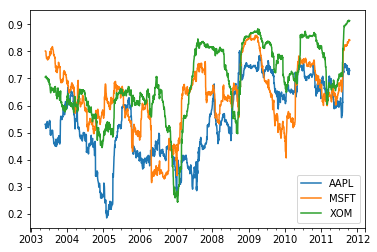

In [195]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [196]:
from scipy.stats import percentileofscore

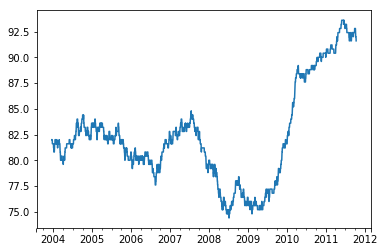

In [197]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw=True)
result.plot()